<a href="https://colab.research.google.com/github/yuanxzMST/Coursework/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Xinzhe Yuan** Homework 5

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint

# **Problem 1** (Example 1.1.2)


In [102]:
# generate the input
x1,x2 = np.meshgrid(np.linspace(-2,2,50),np.linspace(-2,2,50))
X = np.vstack((x1.flatten(),x2.flatten())).T

Text(0.5, 0.92, 'Sigmoid')

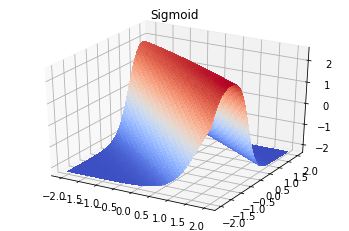

In [112]:
# define the neural network model with sigmoid function
model = Sequential([
                    Dense(2,input_dim = 2, activation='sigmoid'),
                    Dense(1,activation='linear')
])

# set the weights as given
W = [np.array([[-2.69,-2.80], [-3.39,-4.56]]),np.array([-2.21,4.76])]
V = [np.array([[-4.91],[4.95]]),np.array([-2.28])]
model.layers[0].set_weights(W)
model.layers[1].set_weights(V)

# run the model and generate the output
y = model.predict(X)

# plot
fig1 = plt.figure()
ax1 = fig1.gca(projection='3d')

# Plot the surface.
Y = y.reshape(x1.shape)
surf = ax1.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1.set_title('Sigmoid')

Text(0.5, 0.92, 'tanh')

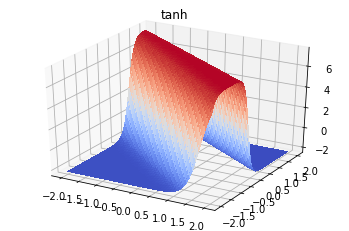

In [111]:
# define the neural network model with tanh function
model = Sequential([
                    Dense(2,input_dim = 2, activation='tanh'),
                    Dense(1,activation='linear')
])

# set the weights as given
W = [np.array([[-2.69,-2.80], [-3.39,-4.56]]),np.array([-2.21,4.76])]
V = [np.array([[-4.91],[4.95]]),np.array([-2.28])]
model.layers[0].set_weights(W)
model.layers[1].set_weights(V)

# run the model and generate the output
y = model.predict(X)

# plot
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')

# Plot the surface.
Y = y.reshape(x1.shape)
surf = ax2.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2.set_title('tanh')

# **Problem 2** (Example 1.1.3)

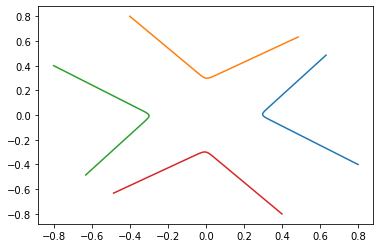

In [245]:
# define hopfield function
def hopfield(x,t):
  g = 100
  tau = 2
  u = np.array([[0],[0]])
  w = np.array([[0,1],[1,0]])
  xi = np.divide(1-np.exp(-g*x.reshape(2,1)),1+np.exp(-g*x.reshape(2,1)))
  xdot = (-x.reshape(2,1)+np.dot(w,xi)+u)/tau
  return np.squeeze(np.asarray(xdot))

# try 4 different initional conditions
x0 = np.array([0.8,-0.4])
x1 = np.array([-0.4,0.8])
x2 = np.array([-0.8,0.4])
x3 = np.array([0.4,-0.8])
t = np.linspace(-1, 1, 1000)
sol0 = odeint(hopfield, x0, t)
sol1 = odeint(hopfield, x1, t)
sol2 = odeint(hopfield, x2, t)
sol3 = odeint(hopfield, x3, t)

# plot the phase-plane trajectory plot of Hopfield Net
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.plot(sol0[:,0],sol0[:,1])
ax3.plot(sol1[:,0],sol1[:,1])
ax3.plot(sol2[:,0],sol2[:,1])
ax3.plot(sol3[:,0],sol3[:,1])


It can be seen that the from 4 different initial conditions [0.8,-0.4], [-0.4,0.8], [-0.8,0.4], [0.4,-0.8], the phase-plane plot is similiar to the given plot in the example.

# **Problem 3** (Example 1.1.4)